## Lab six Omar Elalem(8937288)

### 1. Using SciKit-Learn, train a binary logistic regression model on the Iris dataset. Use all four features and define only 2 labels: virginica and non-virginica. See the logistic regression notebook presented in class for a demonstration on how to set up these labels (3 points).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
sns.set_style("whitegrid")

#### loading dataset

In [2]:
irisdf = load_iris()

#### where X is a matrix of independent variables and yis the dependent variable

In [3]:
X = irisdf.data 
y = irisdf.target 

In [16]:

# Create binary labels: "virginica" (label 1) and "non-virginica" (label 0)
y_binary = np.where(y == 2, 1, 0)

####  Encoding label into two categories: virginica and non-virginica

In [17]:
label_encoder = LabelEncoder() 
y = label_encoder.fit_transform(irisdf.target_names[y_binary])

#### split the data into training and test data

In [18]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#### Building Logistic regression model

In [19]:
## Building Logistic regression model
logReg = LogisticRegression()

#### Fitting the model on training data

In [20]:

logReg.fit(X_train, y_train)

LogisticRegression()

#### making prediction

In [22]:
y_pred = logReg.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [23]:
Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is:", Accuracy)

Accuracy is: 0.9666666666666667


#### creating confusion matrix

In [29]:
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[23  1]
 [ 0  6]]


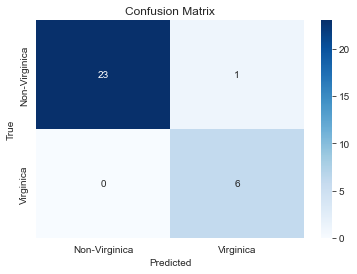

In [30]:
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Virginica", "Virginica"], yticklabels=["Non-Virginica", "Virginica"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Creating the classification report

In [25]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.93      0.98      0.95        30
weighted avg       0.97      0.97      0.97        30



### Evaluate the model:
### Failure modes: in which data instances is the model wrong? (1 point)
### Are there any shared properties for these cases? (1 point)
### How is the model doing across a set of evaluation metrics: accuracy and confusion metric. (1 point)

#### Identfying the indices where model predictied falsely

In [26]:
misclassifiedIndices = np.where(y_test != y_pred)[0]
misclassifiedIndices

array([22], dtype=int64)

In [27]:
for i in misclassifiedIndices:
    print("the model predicted ",y_pred[i]," where it is supposed to predict ",y_test[i])

the model predicted  1  where it is supposed to predict  0


#### I was unable to determine the shared features of the falsly predicted items because it was only one item 
#### NA false positive or false negative